In [1]:
from legal_backend.r_to_py.r_to_py import init_R
from legal_backend.bartCause.bart_cause import BARTCause
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import permutation_test
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
init_R()

### Infer Law Effect

In [3]:
#load csv files and load possible laws
df = pd.read_csv('akbart_data.csv')

In [4]:
df.columns

Index(['percent_of_population_under_15_(2013_2017)',
       'percent_of_population_aged_15_to_64_(2013_2017)',
       'percent_of_population_65plus_(2013_2017)',
       'percent_of_population_white_(non_hispanic)_(2013_2017)',
       'percent_of_populaiton_black_(non_hispanic)_(2013_2017)',
       'percent_of_population_hispanic_or_latino_(2013_2017)',
       'percent_of_population_asian_(non_hispanic)_(2013_2017)',
       'percent_of_population_native_american_alaska_native_(non_hispanic)_(2013_2017)',
       'percent_of_population_native_hawaiian_pacific_islander_(2013_2017)',
       'percent_of_population_aged_25plus_who_have_at_least_a_high_school_diploma_(2013_2017)',
       'percent_of_population_aged_25plus_who_have_a_bachelor's_degree_or_more_(2013_2017)',
       'poverty_rate_(2013_2017)', 'median_household_income_(2013_2017)',
       'unemployment_rate_(2013_2017)',
       'percent_of_residents_with_a_disability_(aged_18_64)_(2013_2017)',
       'percent_of_popualtion_employe

#### PCA

In [35]:
pca = PCA(n_components=2, svd_solver='full')
X = df.iloc[:, :27].to_numpy()
pca.fit(X)
X_new = pca.transform(X)

In [32]:
df_embed = df[df['mdspercapita']<6.77]
df_embed = df_embed[df_embed['percent_of_population_native_american_alaska_native_(non_hispanic)_(2013_2017)']>0.005]

In [38]:
sub_indices = np.array(list(df_embed.index))

In [50]:
mask = np.ones(X_new.shape[0], dtype=bool)
mask[sub_indices] = False
X_others = X_new[mask]

In [53]:
X_sub_embed = X_new[sub_indices,:]

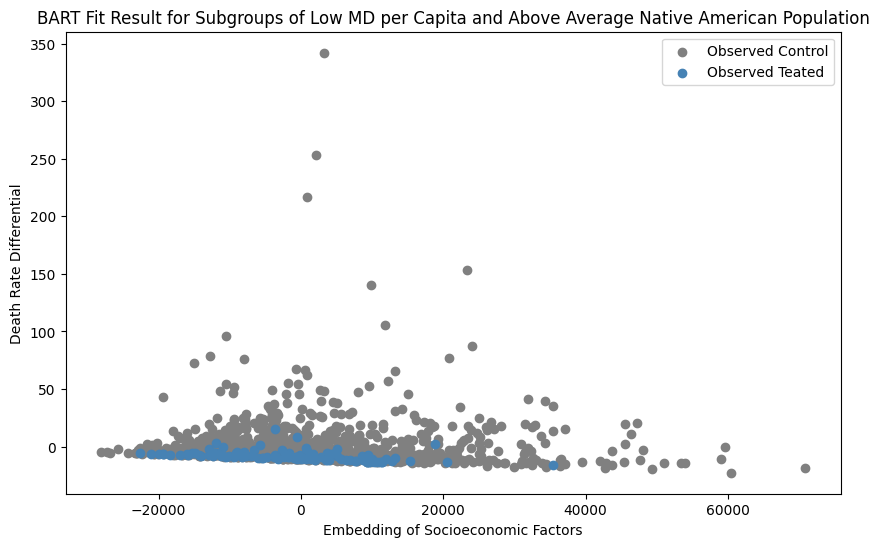

In [54]:

plt.figure(0, figsize=(10,6))
plt.scatter(X_others[:,0], X_others[:,1], marker='o', color='gray', label='Observed Control')   # Square marker
plt.scatter(X_sub_embed[:,0], X_sub_embed[:,1], marker='o', color='steelblue', label='Observed Teated')  # Circle marker


# Add labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('BART Fit Result for Subgroups of Low MD per Capita and Above Average Native American Population')

# Add legend
plt.legend()
# plt.savefig("ak_res/bartfit_mdpercapita.png")
# Display the plot
plt.show()

### Negative Patterns

In [ ]:
# df_pt2 = df[df['percent_of_population_native_american_alaska_native_(non_hispanic)_(2013_2017)']>0.005].reset_index(drop=True)
# law = 'PDMP_proactNo action specified in the law'

In [5]:
# df_sub = df[df['mdspercapita']<6.77].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_native_american_alaska_native_(non_hispanic)_(2013_2017)']>0.005].reset_index(drop=True)
# law = 'PDMP_proactNo action specified in the law'

In [ ]:
# df_sub = df[df['poverty_rate_(2013_2017)']<0.102].reset_index(drop=True)
# law = 'PDMP_any'

In [ ]:
# df_sub = df[df['median_household_income_(2013_2017)']<52314].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']>0.05].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']<0.139].reset_index(drop=True)

In [ ]:
# df_sub = df[df['percent_of_populaiton_black_(non_hispanic)_(2013_2017)']>0.03].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']>0.05].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']<0.139].reset_index(drop=True)
# law = 'PDMP_leowhenActive investigations'

In [6]:
print(law)
print(df_sub.shape[0])
df_sub.head()

PDMP_proactNo action specified in the law
108


,percent_of_population_under_15_(2013_2017),percent_of_population_aged_15_to_64_(2013_2017),percent_of_population_65plus_(2013_2017),percent_of_population_white_(non_hispanic)_(2013_2017),percent_of_populaiton_black_(non_hispanic)_(2013_2017),percent_of_population_hispanic_or_latino_(2013_2017),percent_of_population_asian_(non_hispanic)_(2013_2017),percent_of_population_native_american_alaska_native_(non_hispanic)_(2013_2017),percent_of_population_native_hawaiian_pacific_islander_(2013_2017),percent_of_population_aged_25plus_who_have_at_least_a_high_school_diploma_(2013_2017),...,diff_std,m_law,PDMP_regkind_Pharmacists,PDMP_drepschSchedule V,PDMP_regkind_Podiatrists,ad_write,adult_law,PDMP_regkind_Dentists,PDMP_mimm,PDMP_agencyDepartment of Health
0,0.1837,0.6548,0.1615,0.7666,0.1137,0.0207,0.0009,0.0494,0.0000,0.7754,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.1915,0.6694,0.1391,0.7744,0.1267,0.0569,0.0123,0.0058,0.0001,0.8316,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.2283,0.6439,0.1278,0.7474,0.0143,0.1607,0.0352,0.0130,0.0043,0.8723,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.2060,0.6408,0.1533,0.8548,0.0133,0.0699,0.0175,0.0145,0.0000,0.8528,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.1810,0.6270,0.1920,0.7313,0.2096,0.0320,0.0000,0.0119,0.0000,0.8600,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [7]:
# construct train test data 
def prepare_train_data(df, law):
    train_idxs, test_idxs = train_test_split(list(df.index), test_size=0.2, random_state=1)

    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 


    X_train = X_df[train_idxs,:]
    X_test = X_df[test_idxs,:]

    y_train = y[train_idxs,:]
    y_test= y[test_idxs,:]

    Z_train = Z_law[train_idxs,:]
    Z_test= Z_law[test_idxs,:]

    # standardize data
    scaler_ = preprocessing.StandardScaler().fit(X_train[:,num_cols])
    X_train_scaled = np.copy(X_train)
    X_train_scaled[:,num_cols] = scaler_.transform(X_train[:,num_cols])

    X_test_scaled = np.copy(X_test)
    X_test_scaled[:,num_cols] = scaler_.transform(X_test[:,num_cols])
    return X_train_scaled, y_train, Z_train, X_test_scaled, y_test, Z_test


In [ ]:
X_train_scaled, y_train, Z_train, X_test_scaled, y_test, Z_test = prepare_train_data(df_sub, law)

In [ ]:
bart_eval = BARTCause()

In [ ]:
bart_eval.fit(X_train_scaled, y_train, Z_train, n_samples=1000,  n_burn=200,  n_chains=10)

In [ ]:
def rmse(y, y_pred):
    rmse = np.sqrt((np.sum((y - y_pred) ** 2) / y.shape[0]))
    return rmse

In [ ]:
def nrmse(y, y_pred, norm_method):
    rmse = np.sqrt((np.sum((y - y_pred) ** 2) / y.shape[0]))
    if norm_method=='mean':
        nrmse = rmse / y.mean()
    elif norm_method=='range':
        nrmse = rmse / (y.max() - y.min())
    else:
        nrmse = rmse
    return nrmse

In [ ]:
# evaluate BART fit on response surface
newData = np.concatenate((X_test_scaled, Z_test), axis=1)

y_test_predicted_ = bart_eval.predict(newData, infer_type="mu")
y_test_predicted = y_test_predicted_[:,np.newaxis]

In [ ]:
print("BART RMS:", rmse(y_test,y_test_predicted),"\n", "Baseline RMS:", rmse(y_test,y_test.mean()))

In [ ]:
def r_square(y, y_pred):
    # residual sum of squares
    ss_res = np.sum((y - y_pred) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [ ]:
# evaluate BART fit on response surface
newData = np.concatenate((X_test_scaled, Z_test), axis=1)

y_test_predicted_ = bart_eval.predict(newData, infer_type="mu")
y_test_predicted = y_test_predicted_[:,np.newaxis]

r_square(y_test,y_test_predicted)

#### K-fold Cross Validation

In [ ]:
def kfold_indices(data, k):

    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

In [ ]:
fold_indices = kfold_indices(df_sub, 5)

In [ ]:
def cross_validation_test(df, law, fold_indices):
    bartCause = BARTCause()
    
    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 

    scores = []

    for fold, (train_indices, test_indices) in enumerate(fold_indices):
        print("fold:",fold)
        X_train, y_train, Z_train = X_df[train_indices,:], y[train_indices,:], Z_law[train_indices,:]
        X_test, y_test, Z_test = X_df[test_indices,:], y[test_indices,:], Z_law[test_indices,:]

        # standardize data
        scaler_ = preprocessing.StandardScaler().fit(X_train[:,num_cols])
        X_train_scaled = np.copy(X_train)
        X_train_scaled[:,num_cols] = scaler_.transform(X_train[:,num_cols])

        X_test_scaled = np.copy(X_test)
        X_test_scaled[:,num_cols] = scaler_.transform(X_test[:,num_cols])
        
        # Train the model on the training data
        bartCause.fit(X_train_scaled, y_train, Z_train, n_samples=1000,  n_burn=200,  n_chains=10)

        # Make predictions on the test data
        test_data = np.concatenate((X_test_scaled, Z_test), axis=1)
        y_test_pred_ = bartCause.predict(test_data, infer_type="mu")
        y_test_pred = y_test_pred_[:,np.newaxis]
        
        # Calculate the accuracy score for this fold
        fold_score = nrmse(y_test, y_test_pred, 'range')
        
        # Append the fold score to the list of scores
        scores.append(fold_score)

    # Calculate the mean accuracy across all folds
    mean_score = np.mean(scores)

    return scores, mean_score

In [ ]:
scores, mean_score = cross_validation_test(df_sub, law, fold_indices)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Score:", mean_score)

#### Permutation Test

In [8]:
# construct train test data 
def prepare_permute_data(df, law):

    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 


    # standardize data
    scaler_ = preprocessing.StandardScaler().fit(X_df[:,num_cols])
    X_scaled = np.copy(X_df)
    X_scaled[:,num_cols] = scaler_.transform(X_df[:,num_cols])

    return X_scaled, y, Z_law


In [9]:
bartCause = BARTCause()
X_scaled, y, Z_law = prepare_permute_data(df_sub, law)

In [10]:
bartCause.fit(X_scaled, y, Z_law, n_samples=1000,  n_burn=200,  n_chains=10)

In [11]:
# evaluate BART fit on response surface
newData = np.concatenate((X_scaled, Z_law), axis=1)

predicted_Z1 = bartCause.predict(newData, infer_type="mu.1")
predicted_Z0 = bartCause.predict(newData, infer_type="mu.0")
# predicted_Z1 = predicted_Z1_[:,np.newaxis]
# predicted_Z0 = predicted_Z0_[:,np.newaxis]
mean_law0 = predicted_Z0.mean()
mean_law1 = predicted_Z1.mean()

In [12]:
y_ctf = bartCause.fitted(infer_type="mu.cf")

In [13]:
pca = PCA(n_components=1, svd_solver='full')
X_sub = df_sub.iloc[:, :27].to_numpy()
pca.fit(X_sub)
X_new_sub = pca.transform(X_sub)

In [14]:
data = np.concatenate((X_new_sub, y, y_ctf[:,np.newaxis], Z_law), axis=1)
data.shape

(108, 4)

In [15]:
df_bart = pd.DataFrame(data, columns=["X","death_rate_diff_obs","death_rate_diff_ctf","Law_obs"])

In [16]:
newData = np.concatenate((X_scaled, Z_law), axis=1)
y_pred = bartCause.predict(newData, infer_type="mu")

In [17]:
df_bart = df_bart.assign(Law_ctf = lambda x: 1 - x['Law_obs'])

In [18]:
df_bart['death_rate_diff_pred'] = y_pred

In [19]:
df_bart.sort_values(by=['X'], inplace=True)

In [20]:
x1 = df_bart[df_bart['Law_obs'] == 1]['X'].to_numpy()
x0 = df_bart[df_bart['Law_obs'] == 0]['X'].to_numpy()
y1 = df_bart[df_bart['Law_obs'] == 1]['death_rate_diff_obs'].to_numpy()
y0 = df_bart[df_bart['Law_obs'] == 0]['death_rate_diff_obs'].to_numpy()
y_line1 = df_bart[df_bart['Law_obs'] == 1]['death_rate_diff_pred'].to_numpy()
y_line0 = df_bart[df_bart['Law_obs'] == 0]['death_rate_diff_pred'].to_numpy()

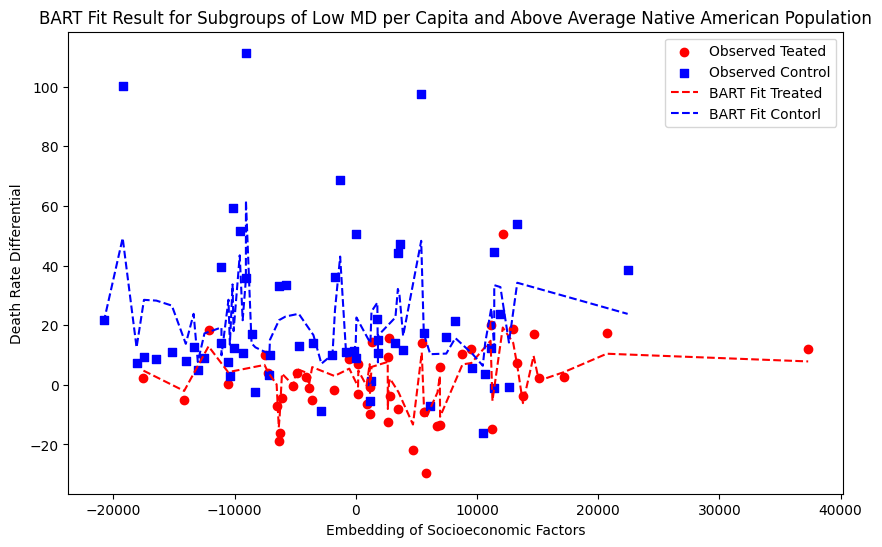

In [31]:

plt.figure(0, figsize=(10,6))
plt.scatter(x1, y1, marker='o', color='red', label='Observed Teated')  # Circle marker
plt.scatter(x0, y0, marker='s', color='blue', label='Observed Control')   # Square marker

# Create line plot with dashed line
plt.plot(x1, y_line1, linestyle='--', color='red', label='BART Fit Treated')
plt.plot(x0, y_line0, linestyle='--', color='blue', label='BART Fit Contorl')

# Add labels and title
plt.xlabel('Embedding of Socioeconomic Factors')
plt.ylabel('Death Rate Differential')
plt.title('BART Fit Result for Subgroups of Low MD per Capita and Above Average Native American Population')

# Add legend
plt.legend()
plt.savefig("ak_res/bartfit_mdpercapita.png")
# Display the plot
plt.show()

In [ ]:
# prepare for permutation test
def statistic(x, y):
    return np.mean(x) - np.mean(y)

#### Permutation test

In [ ]:
res_permute = permutation_test((predicted_Z0, predicted_Z1), statistic, alternative='less')
res_permute

#### Paired Samples t-Test (Dependent Samples t-Test)

In [ ]:
res_ttest = stats.ttest_rel(predicted_Z0, predicted_Z1, alternative='less')
res_ttest

#### Mann-Whitney U Test / Wilcoxon Rank-Sum Test (No normal distribution assumption)

In [ ]:
res_mannwhitneyu = stats.mannwhitneyu(predicted_Z0, predicted_Z1, alternative='less')
res_mannwhitneyu

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(predicted_Z0, bins=30, alpha=0.5, label='Law Inactive')
plt.hist(predicted_Z1, bins=30, alpha=0.5, label='Law Active')

plt.axvline(mean_law0, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_law0 + 2, plt.ylim()[1] * 0.6, f'Inactive Mean: {mean_law0:.3f}', color='darkblue')
plt.axvline(mean_law1, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_law1 + 2, plt.ylim()[1] * 0.4, f'Active Mean: {mean_law1:.3f}', color='red')

plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.45, f'mann-whitney P-value : {res_mannwhitneyu.pvalue:.4f}', color='black')
plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.5, f'permutation P-value: {res_permute.pvalue:.4f}', color='black')
plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.55, f'paired t P-value: {res_ttest.pvalue:.4f}', color='black')


plt.xlabel('Death rate differential(2017 - 2013)')
plt.ylabel('Frequency')
plt.title('Death rate differential grouped by '+ law+'(law)')
plt.legend()
# plt.savefig("ak_res/law_"+law+"grouped4.png")
plt.show()